In [1]:
#Importing relevant libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
#Create a dataframe
df = pd.read_csv('DataSources/House Price.csv')

In [3]:
#Key data analysis
len(df)
df.head()
df.isnull().any()
df.isnull().sum()

Id                0
LotFrontage     259
LotArea           0
Alley          1369
MasVnrArea        8
1stFlrSF          0
2ndFlrSF          0
GrLivArea         0
GarageType       81
GarageArea        0
SalePrice         0
dtype: int64

In [4]:
#check for missing value, unique etc
FileNameDesc = pd.DataFrame(columns = ['column_name','missing_count','percent_missing','unique_count'])
for col in list(df.columns.values):
    sum_missing = df[col].isnull().sum()
    percent_missing = sum_missing/len(df)*100
    uniq_count = (df.groupby([col])[col].count()).count()
    FileNameDesc = FileNameDesc.append({'column_name':col,'missing_count':sum_missing,
                                        'percent_missing':percent_missing,'unique_count':uniq_count},
                                       ignore_index = True)

In [5]:
FileNameDesc

,column_name,missing_count,percent_missing,unique_count
0,Id,0,0.000000,1460
1,LotFrontage,259,17.739726,110
2,LotArea,0,0.000000,1073
3,Alley,1369,93.767123,2
4,MasVnrArea,8,0.547945,327
5,1stFlrSF,0,0.000000,753
6,2ndFlrSF,0,0.000000,417
7,GrLivArea,0,0.000000,861
8,GarageType,81,5.547945,6
9,GarageArea,0,0.000000,441


In [6]:
File_Col_Type = (df.dtypes).reset_index()

In [7]:
#merging Column Type with other information about dataset
FileNameDesc = FileNameDesc.merge(File_Col_Type, left_on = 'column_name', right_on = 'index', how = 'inner')

In [8]:
del FileNameDesc['index']
FileNameDesc = FileNameDesc.rename(index=str, columns = {0:"column_type"})

In [9]:
FileNameDesc

,column_name,missing_count,percent_missing,unique_count,column_type
0,Id,0,0.000000,1460,int64
1,LotFrontage,259,17.739726,110,float64
2,LotArea,0,0.000000,1073,int64
3,Alley,1369,93.767123,2,object
4,MasVnrArea,8,0.547945,327,float64
5,1stFlrSF,0,0.000000,753,int64
6,2ndFlrSF,0,0.000000,417,int64
7,GrLivArea,0,0.000000,861,int64
8,GarageType,81,5.547945,6,object
9,GarageArea,0,0.000000,441,int64


In [10]:
#Drop column with more than 25% null values
df.drop(['Alley'], axis = 1, inplace = True)

In [11]:
#Apply Mode strategy to populate the categorical data
df.groupby('GarageType').agg({'GarageType': np.size})
df["GarageType"]=df["GarageType"].fillna('Attchd')
df["GarageType"] = df["GarageType"].astype('category')
df["GarageType"] = df["GarageType"].cat.codes

In [12]:
#Mean strategy to populate the quantitative variable
df["LotFrontage"].fillna(df["LotFrontage"].mean(), inplace=True)

In [13]:
#Median strategy to populate the quantitative variable
df["MasVnrArea"].fillna(df["MasVnrArea"].median(), inplace=True)

In [14]:
df = pd.get_dummies(df, columns=['GarageType'], drop_first=True)

In [15]:
df1=df['SalePrice']

In [16]:
df.drop(['SalePrice'], axis = 1, inplace = True)

In [17]:
df=pd.concat([df,df1],axis=1)

In [18]:
#Key data analysis
len(df)
df.head()
df.isnull().any()
df.isnull().sum()

Id              0
LotFrontage     0
LotArea         0
MasVnrArea      0
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
GarageArea      0
GarageType_1    0
GarageType_2    0
GarageType_3    0
GarageType_4    0
GarageType_5    0
SalePrice       0
dtype: int64

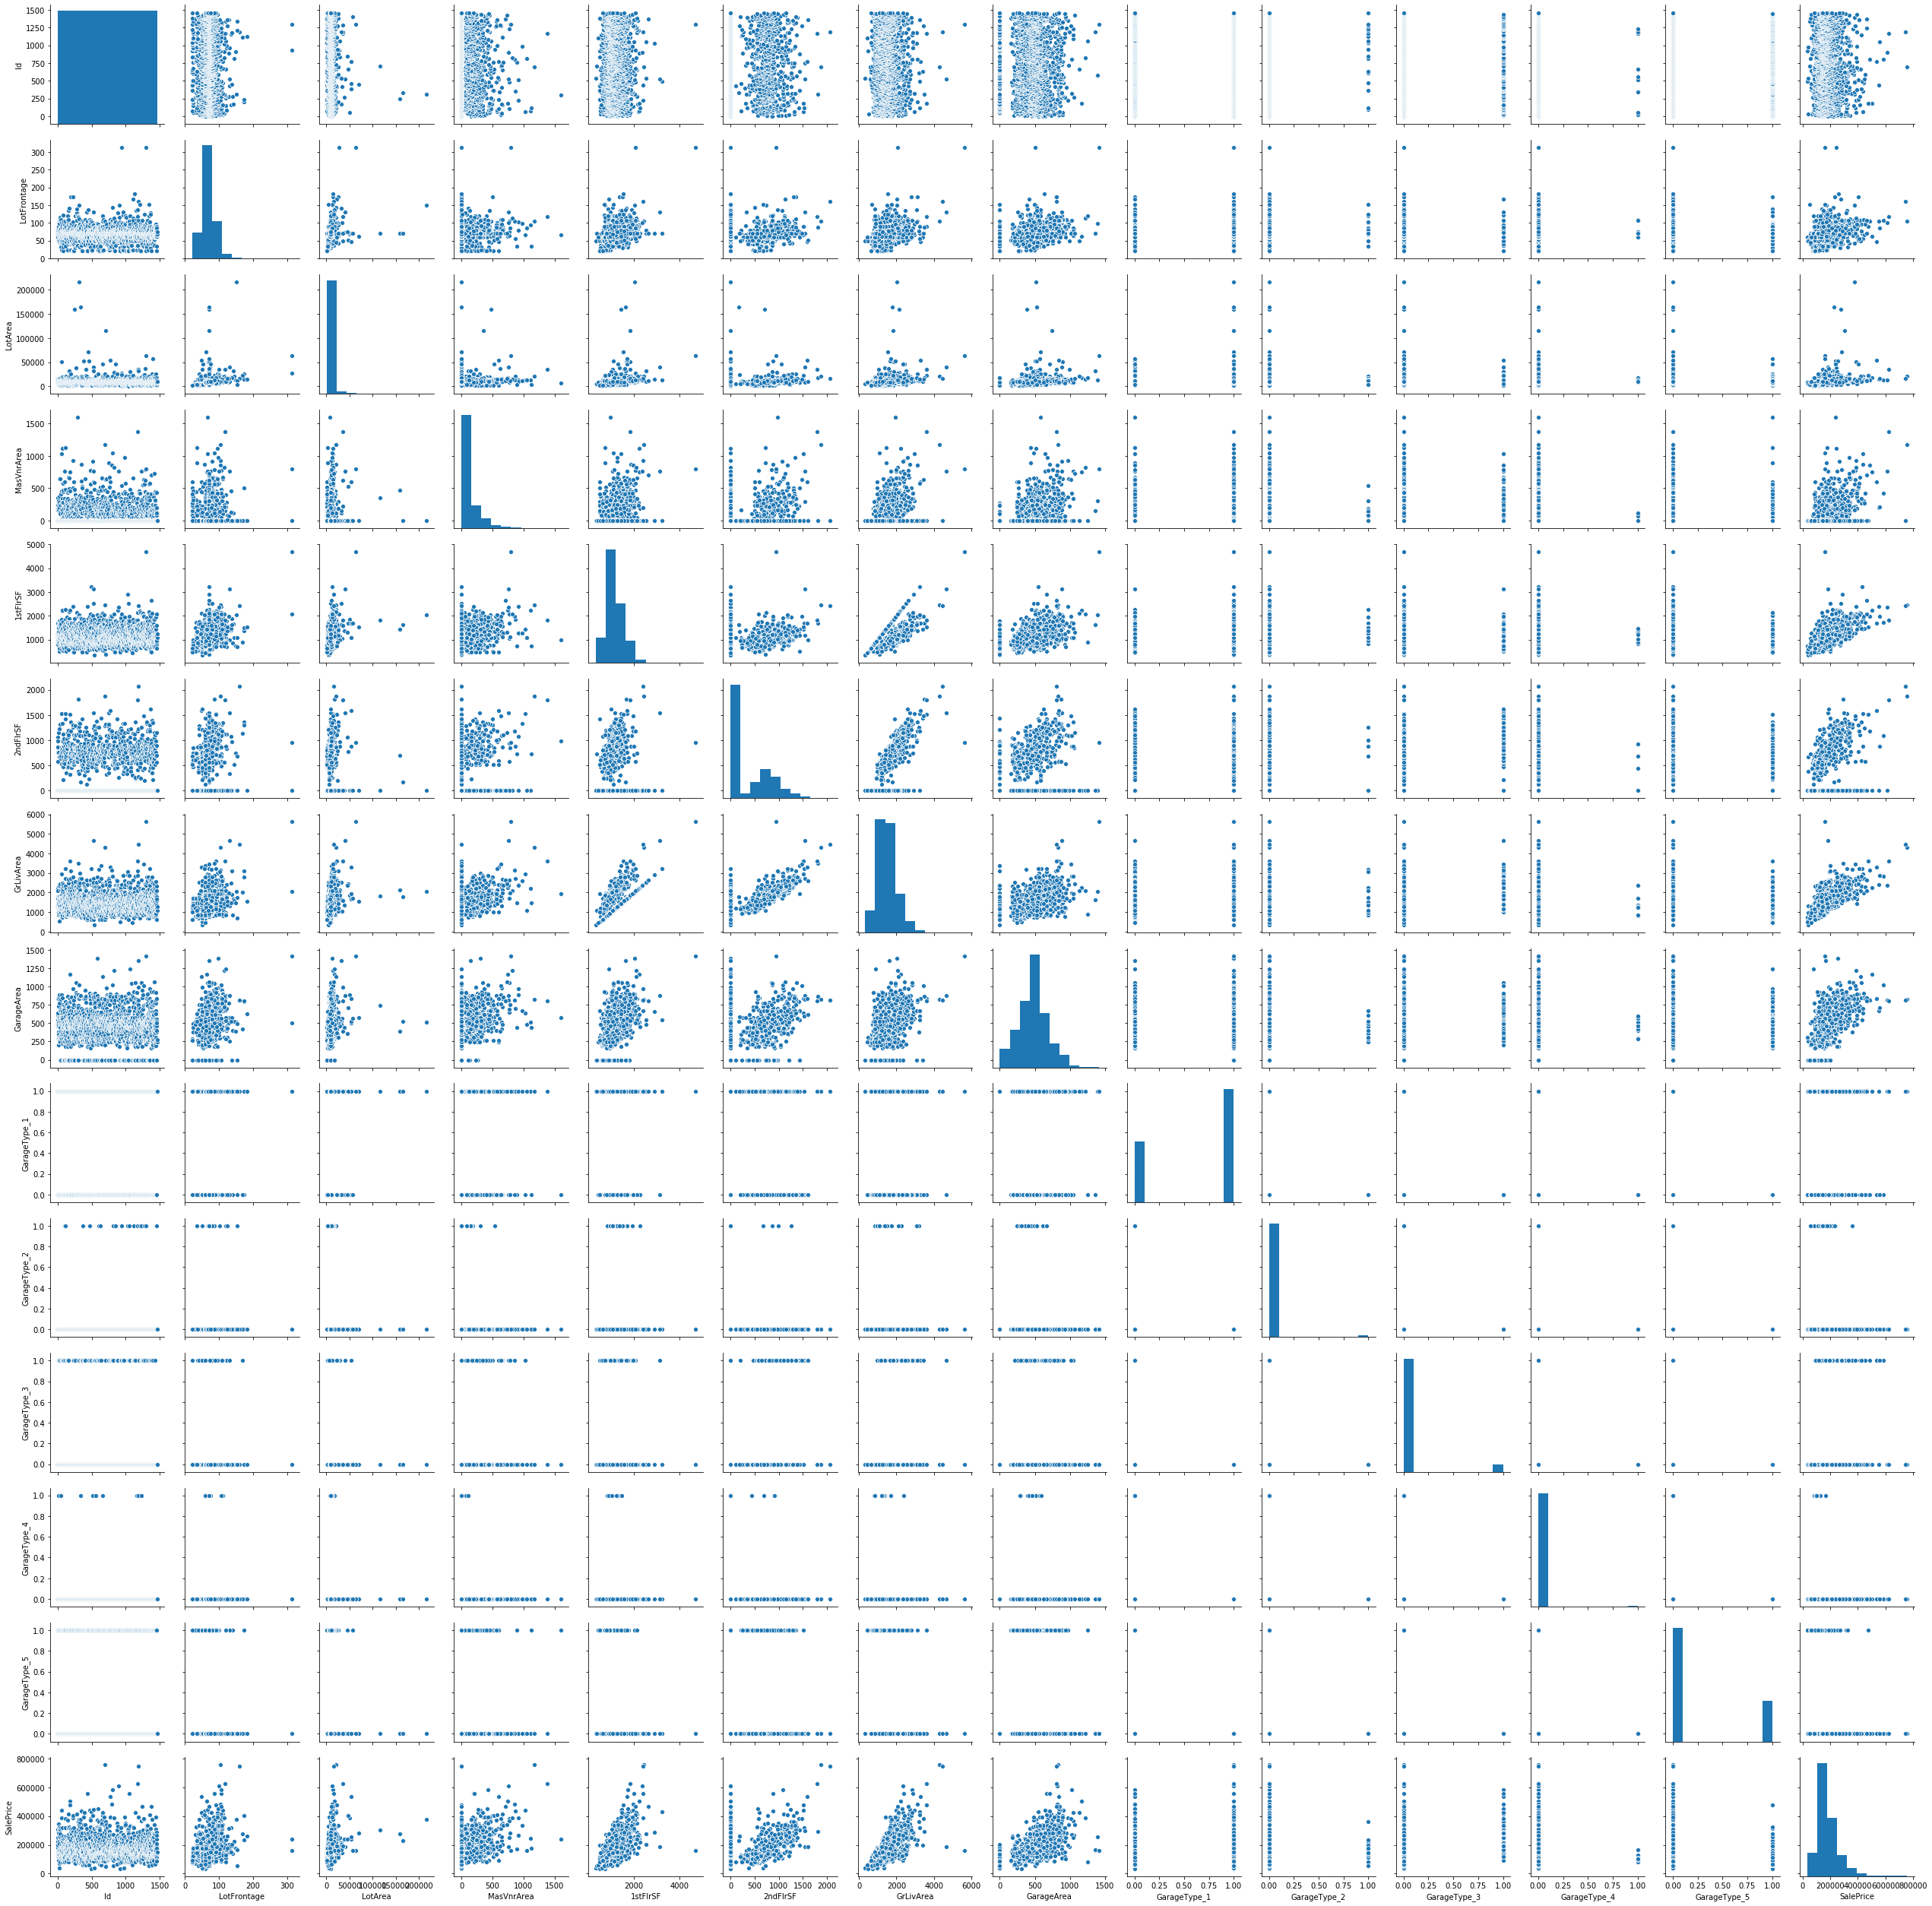

In [19]:
#Analyse the selected variables 
sns.pairplot(df)

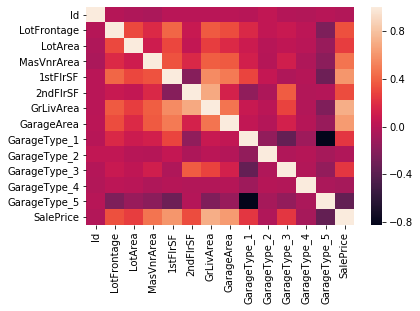

In [20]:
df.corr()
sns.heatmap(df.corr(),annot=False)

In [21]:
x = df.iloc[:,1:13]
y = df.iloc[:,13:]

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 100) 

In [23]:
lm = LinearRegression()
lm = lm.fit(x_train,y_train)   #lm.fit(input,output)

In [24]:
lm.coef_

array([[-1.89195406e+02,  2.92488563e-01,  5.77934108e+01,
         9.31370291e+01,  6.58204127e+01, -8.60850226e+00,
         1.17301334e+02,  1.09608841e+05,  8.00334258e+04,
         1.17818148e+05,  4.44584210e+04,  7.70242422e+04]])

In [25]:
coefficients = pd.concat([pd.DataFrame(x_train.columns),pd.DataFrame(np.transpose(lm.coef_))], axis = 1)

In [26]:
lm.intercept_

array([-89484.77986411])

In [27]:
y_pred = lm.predict(x_test)

In [28]:
r2_score(y_test,y_pred)

0.7252823600649496

In [29]:
x_train = sm.add_constant(x_train) ## let's add an intercept (beta_0) to our model
x_test = sm.add_constant(x_test) 

/Users/pratikajitb/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [30]:
lm2 = sm.OLS(y_train,x_train).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     204.5
Date:                Sat, 28 Mar 2020   Prob (F-statistic):          1.46e-275
Time:                        13:02:27   Log-Likelihood:                -14167.
No. Observations:                1168   AIC:                         2.836e+04
Df Residuals:                    1155   BIC:                         2.843e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -8.948e+04   2.36e+04     -3.791      0.000   -1.36e+05   -4.32e+04
LotFrontage   -189.1954     71.606     -2.642      0.008    -329.688     -48.703
LotArea          0.2925      0.146      2.009      0.045       0.007       0.578
MasVnrArea      57.7934      8.108      7.128      0.000      41.885      73.702
1stFlrSF        93.1370     28.686      3.247      0.001      36.855     149.419
2ndFlrSF        65.8204     28.531      2.307      0.021       9.841     121.799
GrLivArea       -8.6085     27.985     -0.308      0.758     -63.515      46.298
GarageArea     117.3013      7.725     15.186      0.000     102.146     132.457
GarageType_1  1.096e+05   2.28e+04      4.800      0.000    6.48e+04    1.54e+05
GarageType_2  8.003e+04   2.57e+04      3.117      0.002    2.96e+04     1.3e+05
GarageType_3  1.178e+05   2.35e+04      5.018      0.000    7.18e+04    1.64e+05
GarageType_4  4.446e+04   2.84e+04      1.563      0.118   -1.13e+04       1e+05
GarageType_5  7.702e+04   2.29e+04      3.360      0.001     3.2e+04    1.22e+05
==============================================================================
Omnibus:                      310.143   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19460.508
Skew:                          -0.211   Prob(JB):                         0.00
Kurtosis:                      22.992   Cond. No.                     6.21e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
y_pred2 = lm2.predict(x_test) 

In [32]:
[variance_inflation_factor(x_train.values, j) for j in range(x_train.shape[1])]

[320.47067916846385,
 1.3887387339844857,
 1.179183014072642,
 1.2736938476210036,
 73.67133424424186,
 89.18693987796412,
 124.14493886612065,
 1.5735242103866272,
 68.89459584241644,
 4.807477641487925,
 18.810114483613532,
 2.7708661910283428,
 59.87365529118377]

In [33]:
def calculate_vif(x):
    thresh = 5.0
    output = pd.DataFrame()
    k = x.shape[1]
    vif = [variance_inflation_factor(x.values, j) for j in range(x.shape[1])]
    for i in range(1,k):
        print("Iteration no.")
        print(i)
        print(vif)
        a = np.argmax(vif)
        print("Max VIF is for variable no.:")
        print(a)
        if vif[a] <= thresh :
            break
        if i == 1 :          
            output = x.drop(x.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        elif i > 1 :
            output = output.drop(output.columns[a],axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    return(output)
train_out = calculate_vif(x_train) 

Iteration no.
1
[320.47067916846385, 1.3887387339844857, 1.179183014072642, 1.2736938476210036, 73.67133424424186, 89.18693987796412, 124.14493886612065, 1.5735242103866272, 68.89459584241644, 4.807477641487925, 18.810114483613532, 2.7708661910283428, 59.87365529118377]
Max VIF is for variable no.:
0
Iteration no.
2
[15.696736998470751, 2.516498231064144, 1.6638694982956581, 719.9915541826934, 145.299014165676, 1165.9487895886289, 9.088083058596485, 12.564521376627772, 1.268867261908879, 2.437945225671545, 1.1146106848592898, 4.395299903697359]
Max VIF is for variable no.:
5
Iteration no.
3
[15.620496845437529, 2.515540126602159, 1.6595359790917907, 18.992307379197022, 2.240573493056481, 8.9231756122934, 12.554535830553894, 1.267790218067265, 2.433166544562162, 1.114242353292807, 4.393458872281613]
Max VIF is for variable no.:
3
Iteration no.
4
[14.63125549601591, 2.428552776063903, 1.5790230198205009, 1.9697793427331647, 7.33581376281141, 9.543433511835152, 1.185267136862559, 2.214770

In [34]:
train_out.head()

,LotArea,MasVnrArea,2ndFlrSF,GarageType_1,GarageType_2,GarageType_3,GarageType_4,GarageType_5
133,6853,136.0,0,1,0,0,0,0
290,15611,0.0,840,1,0,0,0,0
24,8246,0.0,0,1,0,0,0,0
1093,9230,166.0,0,0,0,0,0,1
1288,5664,0.0,0,1,0,0,0,0


In [35]:
x_test.head()
x_test.drop(["LotFrontage","1stFlrSF","GrLivArea",'GarageArea'],axis = 1,inplace = True)
x_test.head()

,const,LotArea,MasVnrArea,2ndFlrSF,GarageType_1,GarageType_2,GarageType_3,GarageType_4,GarageType_5
1436,1.0,9000,0.0,0,0,0,0,0,1
57,1.0,11645,0.0,860,1,0,0,0,0
780,1.0,7875,38.0,0,1,0,0,0,0
382,1.0,9245,0.0,858,1,0,0,0,0
1170,1.0,9880,0.0,0,1,0,0,0,0


In [36]:
train_out = sm.add_constant(train_out) ## let's add an intercept (beta_0) to our model
X_test = sm.add_constant(x_test)
lm2 = sm.OLS(y_train,train_out).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     98.59
Date:                Sat, 28 Mar 2020   Prob (F-statistic):          4.98e-125
Time:                        13:02:27   Log-Likelihood:                -14529.
No. Observations:                1168   AIC:                         2.908e+04
Df Residuals:                    1159   BIC:                         2.912e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.031e+05   3.08e+04      3.345      0.001    4.26e+04    1.64e+05
LotArea          1.4221      0.185      7.697      0.000       1.060       1.785
MasVnrArea     160.4163     10.088     15.902      0.000     140.624     180.208
2ndFlrSF        39.0668      4.510      8.663      0.000      30.219      47.915
GarageType_1    4.7e+04   3.08e+04      1.527      0.127   -1.34e+04    1.07e+05
GarageType_2  1.591e+04   3.45e+04      0.461      0.645   -5.18e+04    8.37e+04
GarageType_3  5.496e+04   3.17e+04      1.733      0.083   -7262.212    1.17e+05
GarageType_4 -2.119e+04   3.85e+04     -0.551      0.582   -9.67e+04    5.43e+04
GarageType_5 -4522.0716   3.09e+04     -0.146      0.884   -6.52e+04    5.61e+04
==============================================================================
Omnibus:                      418.867   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2987.986
Skew:                           1.471   Prob(JB):                         0.00
Kurtosis:                      10.262   Cond. No.                     6.10e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""